In [1]:
#upload drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [3]:
c1 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x = open("/content/drive/MyDrive/PCD/data/data1_matriceB.txt", "r")
k=0
for line in fichier_matrice_x:
  l=list(line.split(" "))
  for j in range(10000):
    c1[k][j]=float(l[j])
  k+=1


In [4]:
c2 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x1 = open("/content/drive/MyDrive/PCD/data/data1_matriceBB.txt", "r")
k=0  
for line in fichier_matrice_x1:
  l1=list(line.split(" "))

  for j in range(10000):
    c2[k][j]=float(l1[j]) 
  k+=1

In [5]:
#model autoencoder data couche1
input_df = Input( shape = (10000, ))
x = Dense(8000, activation = 'relu')(input_df)
#x = Dense(15000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(15000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(10000, kernel_initializer='glorot_uniform')(x)
autoencoder_c1 = Model(input_df, decoded)
encoder_c1 = Model(input_df, encoded)
autoencoder_c1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [6]:
#training couche1
autoencoder_c1.fit(c1,c1, batch_size= 120, epochs = 21, verbose = 1)

Epoch 1/21
84/84 [==============================] - 18s 54ms/step - loss: 1.3860e-05 - accuracy: 0.1926
Epoch 2/21
84/84 [==============================] - 4s 53ms/step - loss: 8.1541e-06 - accuracy: 0.2034
Epoch 3/21
84/84 [==============================] - 4s 53ms/step - loss: 8.3069e-06 - accuracy: 0.2063
Epoch 4/21
84/84 [==============================] - 4s 54ms/step - loss: 8.0227e-06 - accuracy: 0.2015
Epoch 5/21
84/84 [==============================] - 4s 53ms/step - loss: 1.0327e-05 - accuracy: 0.2066
Epoch 6/21
84/84 [==============================] - 4s 53ms/step - loss: 9.3711e-06 - accuracy: 0.2163
Epoch 7/21
84/84 [==============================] - 4s 53ms/step - loss: 7.5065e-06 - accuracy: 0.2183
Epoch 8/21
84/84 [==============================] - 4s 53ms/step - loss: 7.8667e-06 - accuracy: 0.2200
Epoch 9/21
84/84 [==============================] - 4s 53ms/step - loss: 7.0449e-06 - accuracy: 0.2124
Epoch 10/21
84/84 [==============================] - 5s 54ms/step - loss

In [9]:
pred_c1 = encoder_c1.predict(c1)

In [10]:
spectral = SpectralClustering(n_clusters=3)
spectral.fit_predict(pred_c1)
labels_c1 = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_c1, labels_c1)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_c1, labels_c1)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_c1, labels_c1)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

8021.833714938021
0.4903407695501996
0.8546938


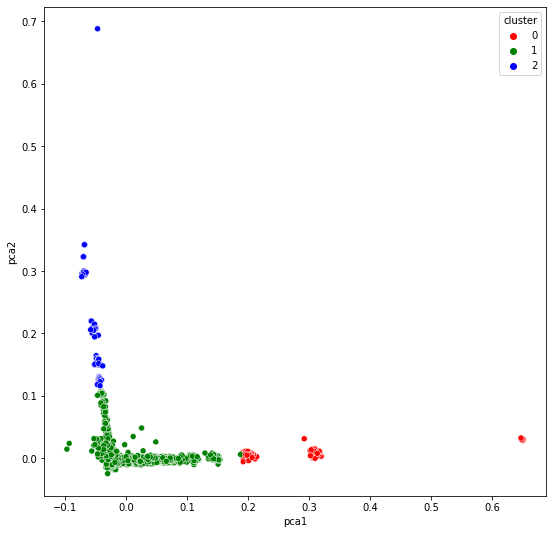

In [11]:
# graphe couche1
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred_c1)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c1})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']

In [12]:
#model autoencoder data couche2
input_df = Input( shape = (10000, ))
x = Dense(10000, activation = 'relu')(input_df)
#x = Dense(15000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(6, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(15000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(10000, kernel_initializer='glorot_uniform')(x)
autoencoder_c2 = Model(input_df, decoded)
encoder_c2 = Model(input_df, encoded)
autoencoder_c2.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [13]:
#training data community
autoencoder_c2.fit(c2, c2, batch_size= 120, epochs = 30, verbose = 1)

Epoch 1/30
84/84 [==============================] - 8s 82ms/step - loss: 6.1951e-06 - accuracy: 0.0654
Epoch 2/30
84/84 [==============================] - 7s 82ms/step - loss: 6.3687e-06 - accuracy: 0.0699
Epoch 3/30
84/84 [==============================] - 7s 82ms/step - loss: 7.1341e-06 - accuracy: 0.0731
Epoch 4/30
84/84 [==============================] - 7s 82ms/step - loss: 6.5277e-06 - accuracy: 0.0691
Epoch 5/30
84/84 [==============================] - 7s 83ms/step - loss: 6.4279e-06 - accuracy: 0.0655
Epoch 6/30
84/84 [==============================] - 7s 83ms/step - loss: 7.1653e-06 - accuracy: 0.0671
Epoch 7/30
84/84 [==============================] - 7s 83ms/step - loss: 5.9472e-06 - accuracy: 0.0653
Epoch 8/30
84/84 [==============================] - 7s 84ms/step - loss: 7.4438e-06 - accuracy: 0.0692
Epoch 9/30
84/84 [==============================] - 7s 84ms/step - loss: 6.5286e-06 - accuracy: 0.0666
Epoch 10/30
84/84 [==============================] - 7s 84ms/step - loss:

In [17]:
#predect data compression
pred_c2 = encoder_c2.predict(c2)

In [18]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(pred_c2)
labels_c2 = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_c2, labels_c2)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_c2, labels_c2)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_c2, labels_c2)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

3023.396091505907
0.2675707987809317
0.9826435


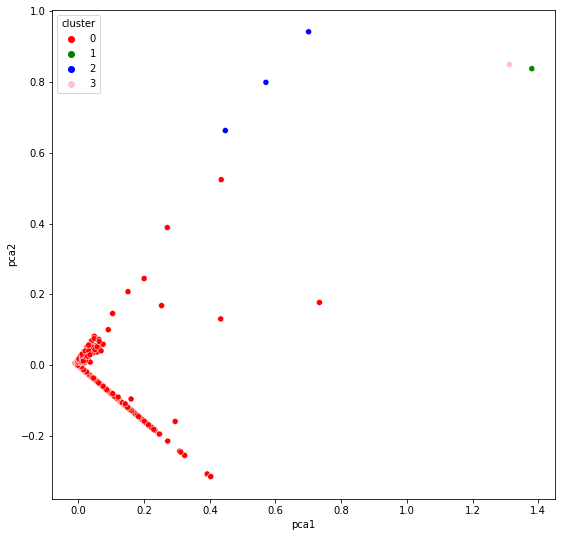

In [19]:
# graphe couche2
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred_c2)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c2})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']

In [ ]:
n=0
for i  in labels_c2:
  if(i==3 ):
    n+=1
n    

In [ ]:
labels_c2

In [21]:
#fusionner les deux couches
M = np.zeros((10000,10000),dtype='float')
k=0
for i in range(10000):
  for j in range(i+1,10000):
    if(labels_c1[i]==labels_c1[j]):
      k+=0.25
    if(labels_c2[i]==labels_c2[j]):
      k+=0.75  
    M[i][j]=k
    M[j][i]=k
    k=0

In [22]:
#trouver le i_leader
B_M=np.sum(M,axis=0)
l_M=B_M.tolist()
i_leader=l_M.index(max(l_M))

In [23]:
M

array([[0.  , 0.  , 0.  , ..., 0.75, 0.  , 0.25],
       [0.  , 0.  , 1.  , ..., 0.25, 0.25, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.25, 0.25, 0.  ],
       ...,
       [0.75, 0.25, 0.25, ..., 0.  , 0.25, 0.  ],
       [0.  , 0.25, 0.25, ..., 0.25, 0.  , 0.  ],
       [0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [24]:
#M modifié
l3=list(range(10000))
A=M
o_M=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_M.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_M.append(i_leader)  
print(l3)
print(len(o_M)) 
print(o_M)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0.11441278457641602
0.11386775970458984
0.11718273162841797
0.11488509178161621
0.1135091781616211
0.10931062698364258
0.11584162712097168
0.1122136116027832
0.1112375259399414
0.10851597785949707
0.12038826942443848
0.11508297920227051
0.11439704895019531
0.11134862899780273
0.11610245704650879
0.11637258529663086
0.12019562721252441
0.10705757141113281
0.11597585678100586
0.11812257766723633
0.11504316329956055
0.10585784912109375
0.11503887176513672
0.10692667961120605
0.1146235466003418
0.11282873153686523
0.11496353149414062
0.11445426940917969
0.12937307357788086
0.11750221252441406
0.11386847496032715
0.10822367668151855
0.11237812042236328
0.1166994571685791
0.11627388000488281
0.11701536178588867
0.12309885025024414
0.11436605453491211
0.11752963066101074
0.11295747756958008
0.11838698387145996
0.10690903663635254
0.11172270774841309
0.11277461051940918
0.1168220043182373
0.11583662033081055
0.117361

In [25]:
C_M = np.zeros((10000,10000),dtype='float')
for i in range(10000):
  for j in range(10000):
    C_M[i][j]=M[o_M[i]][o_M[j]]

In [ ]:
M = np.zeros((10000,10000),dtype='float')
fichier_matrice_x = open("/content/drive/MyDrive/PCD/data/M.txt", "r")
k=0
for line in fichier_matrice_x:
  l=list(line.split(" "))
  for j in range(10000):
    M[k][j]=float(l[j])
  k+=1

In [ ]:
M

In [ ]:
M.shape

In [ ]:
scaler = StandardScaler()
data_scaled_cf = scaler.fit_transform(M)

In [ ]:
data_scaled_cf

In [26]:
#model autoencoder data couche_finale
input_df = Input( shape = (10000, ))
x = Dense(8000, activation = 'relu')(input_df)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(5, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x= Dense(8000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(10000, kernel_initializer='glorot_uniform')(x)
autoencoder_cf = Model(input_df, decoded)
encoder_cf = Model(input_df, encoded)
autoencoder_cf.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [27]:
autoencoder_cf.fit(C_M, C_M, batch_size= 120, epochs = 21, verbose = 1)

Epoch 1/21
84/84 [==============================] - 7s 75ms/step - loss: 14.1581 - accuracy: 0.0000e+00
Epoch 2/21
84/84 [==============================] - 6s 75ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 3/21
84/84 [==============================] - 6s 75ms/step - loss: 2.7860e-04 - accuracy: 0.0000e+00
Epoch 4/21
84/84 [==============================] - 6s 76ms/step - loss: 2.9023e-04 - accuracy: 0.0000e+00
Epoch 5/21
84/84 [==============================] - 6s 76ms/step - loss: 2.9070e-04 - accuracy: 0.0000e+00
Epoch 6/21
84/84 [==============================] - 6s 76ms/step - loss: 2.9391e-04 - accuracy: 0.0000e+00
Epoch 7/21
84/84 [==============================] - 6s 76ms/step - loss: 3.0226e-04 - accuracy: 0.0000e+00
Epoch 8/21
84/84 [==============================] - 6s 76ms/step - loss: 2.8159e-04 - accuracy: 0.0000e+00
Epoch 9/21
84/84 [==============================] - 6s 75ms/step - loss: 2.9600e-04 - accuracy: 0.0000e+00
Epoch 10/21
84/84 [=========================

In [28]:
pred_cf = encoder_cf.predict(C_M)

In [29]:
pred_cf

array([[0.0000000e+00, 0.0000000e+00, 1.0285037e+00, 0.0000000e+00,
        1.3422492e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0291709e+00, 0.0000000e+00,
        1.3435731e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0271997e+00, 0.0000000e+00,
        1.3435504e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 2.2447816e-01, 0.0000000e+00,
        3.4705818e-01],
       [0.0000000e+00, 0.0000000e+00, 2.8112592e-02, 0.0000000e+00,
        2.6420783e-04],
       [4.7253922e-04, 7.7494257e-03, 3.6178134e-02, 0.0000000e+00,
        2.8946972e-03]], dtype=float32)

In [30]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(pred_cf)
labels_cf = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_cf, labels_cf)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_cf, labels_cf)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_cf, labels_cf)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

6193269.8433665475
0.028472401836845664
0.99636906


In [ ]:
fichier = open("M.txt", "w")
st=""
for i in range(10000):
  for j in range(10000):
    st=str(M[i][j])
    fichier.write(st+" ")
  fichier.write(st+"\n")    
fichier.close()

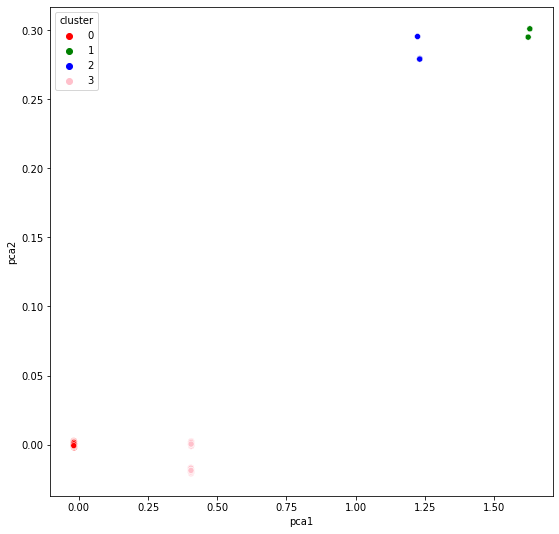

In [32]:
# couche finale
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred_cf)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_cf})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']